Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
data = pd.read_csv('D:/energy_efficiency/notebooks/data/ENB2012_data.csv')

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
data.shape

(768, 10)

In [6]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [9]:
X=data.drop(['Y1','Y2'],axis=1)
y1=data['Y1']
y2=data['Y2']

In [10]:
X

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [11]:
y1

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64

In [12]:
y2

0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Y2, Length: 768, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test,y1_train,y1_test,y2_train,y2_test=train_test_split(X, y1, y2, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [15]:
X_train

array([[ 0.55367107, -0.6962224 , -0.00737214, ..., -1.36441084,
        -1.01029954, -1.1605984 ],
       [-1.15511771,  1.25066366,  0.55843925, ...,  0.44108109,
         1.22779036, -0.51570481],
       [ 0.93340191, -0.97434898, -0.57318352, ...,  0.44108109,
         0.10874541, -0.51570481],
       ...,
       [-0.49058874,  0.41628392, -1.13899491, ...,  0.44108109,
        -1.01029954,  1.41897596],
       [ 2.07259443, -1.80872872, -0.57318352, ...,  1.34382706,
         0.10874541,  0.77408237],
       [ 1.31313275, -1.25247556, -0.00737214, ...,  0.44108109,
        -1.01029954, -0.51570481]])

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, 
                                                      criterion='squared_error', 
                                                      max_depth=5, min_samples_split=5,
                                                        min_samples_leaf=3, 
                                                        min_weight_fraction_leaf=0.0, 
                                                        max_features=1.0, 
                                                        max_leaf_nodes=None, 
                                                        oob_score=False, 
                                                        n_jobs=None, 
                                                        random_state=None),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list1 =[]
r2_list2 =[]

for i in range(len(list(models))):
    model1 = list(models.values())[i]
    model1.fit(X_train, y1_train)
    model2 = list(models.values())[i]           
    model2.fit(X_train, y2_train)# Train model

    # Make predictions
    y1_train_pred = model1.predict(X_train)
    y2_train_pred = model2.predict(X_train)
    y1_test_pred = model1.predict(X_test)
    y2_test_pred = model2.predict(X_test)
    # Evaluate Train and Test dataset
    model1_train_mae1 , model1_train_rmse1, model1_train_r21 = evaluate_model(y1_train, y1_train_pred)
    model2_train_mae2 , model2_train_rmse2, model2_train_r22= evaluate_model(y2_train, y2_train_pred)
    

    model1_test_mae1 , model1_test_rmse1, model1_test_r21 = evaluate_model(y1_test, y1_test_pred)
    model2_test_mae2 , model2_test_rmse2, model2_test_r22 = evaluate_model(y2_test, y2_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set when y is y1')
    print("- Root Mean Squared Error: {:.4f}".format(model1_train_rmse1))
    print("- Mean Absolute Error: {:.4f}".format(model1_train_mae1))
    print("- R2 Score: {:.4f}".format(model1_train_r21))

    print('----------------------------------')
    
    print('Model performance for Test set when y is y1')
    print("- Root Mean Squared Error: {:.4f}".format(model1_test_rmse1))
    print("- Mean Absolute Error: {:.4f}".format(model1_test_mae1))
    print("- R2 Score: {:.4f}".format(model1_test_r21))
    r2_list1.append(model1_test_r21)
    
    print('='*35)
    print('\n')  
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set when y is y2')
    print("- Root Mean Squared Error: {:.4f}".format(model2_train_rmse2))
    print("- Mean Absolute Error: {:.4f}".format(model2_train_mae2))
    print("- R2 Score: {:.4f}".format(model2_train_r22))

    print('----------------------------------')
    
    print('Model performance for Test set when y is y2')
    print("- Root Mean Squared Error: {:.4f}".format(model2_test_rmse2))
    print("- Mean Absolute Error: {:.4f}".format(model2_test_mae2))
    print("- R2 Score: {:.4f}".format(model2_test_r22))
    r2_list2.append(model2_test_r22)
    
    print('='*35)
    print('\n')  
    


Linear Regression
Model performance for Training set when y is y1
- Root Mean Squared Error: 3.8192
- Mean Absolute Error: 3.1119
- R2 Score: 0.8555
----------------------------------
Model performance for Test set when y is y1
- Root Mean Squared Error: 3.7648
- Mean Absolute Error: 3.0600
- R2 Score: 0.8640


Linear Regression
Model performance for Training set when y is y2
- Root Mean Squared Error: 3.2020
- Mean Absolute Error: 2.2238
- R2 Score: 0.8857
----------------------------------
Model performance for Test set when y is y2
- Root Mean Squared Error: 3.1508
- Mean Absolute Error: 2.1776
- R2 Score: 0.8929


Lasso
Model performance for Training set when y is y1
- Root Mean Squared Error: 4.5523
- Mean Absolute Error: 3.8553
- R2 Score: 0.7947
----------------------------------
Model performance for Test set when y is y1
- Root Mean Squared Error: 4.5169
- Mean Absolute Error: 3.8325
- R2 Score: 0.8043


Lasso
Model performance for Training set when y is y2
- Root Mean Squared

In [18]:
pd.DataFrame(list(zip(model_list, r2_list1, r2_list2)), columns=['Model Name',  'R2_Score for Y1', 'R2_Score for Y2']).sort_values(by=["R2_Score for Y1","R2_Score for Y2"],ascending=False)

,Model Name,R2_Score for Y1,R2_Score for Y2
5,Ridge,0.925812,0.960679
6,K-Neighbors Regressor,0.905095,0.992050
4,Ridge,0.903729,0.955858
7,K-Neighbors Regressor,0.903277,0.995286
8,Decision Tree,0.887063,0.939077
3,Lasso,0.877481,0.929169
2,Lasso,0.865387,0.892753
0,Linear Regression,0.864014,0.892861
1,Linear Regression,0.804262,0.851578


Text(0, 0.5, 'Predicted')

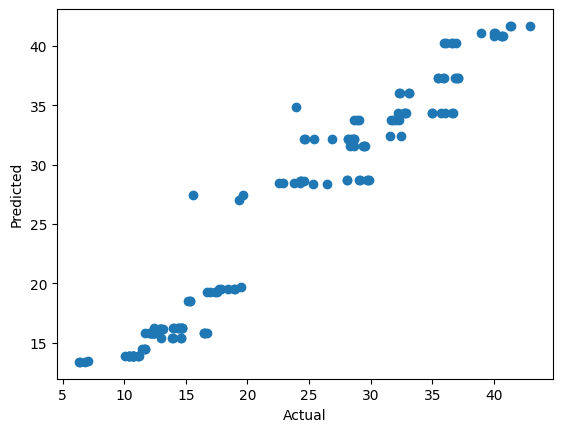

In [19]:
plt.scatter(y1_test,y1_test_pred )
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted')

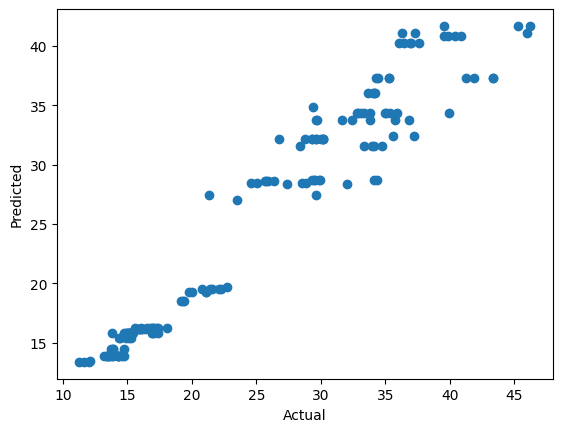

In [20]:
plt.scatter(y2_test,y2_test_pred )
plt.xlabel('Actual')
plt.ylabel('Predicted')